In [1]:
import pandas as pd

In [4]:
df = pd.read_csv ('Dataset/nyc_jobs.csv')


In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import re 
import nltk as nlp
from plotly.offline import iplot

In [15]:
#Selecting Random data and recogonising it
df['skills']=df['Preferred Skills']


first_description=df.skills[2]

In [16]:
first_description

"1.  A High School Diploma or GED.  2.  CDL Driver's License.  3.  Excellent trouble-shooting ability and mechanical aptitude.  4.  Excellent analytical and organizational skills.  5.  Ability to trouble-shoot various types of vacuum heating equipment.  6.  Knowledge of steam and pneumatic heating systems; steam and hot water generating systems; various types of heat, air and water pumps.  7.  Knowledge of Maximo work order system."

In [17]:
description=re.sub("[^a-zA-Z]"," ",first_description)

description = description.lower()
print("First value :::::::::::::: {0}   \nSecond value :::::::::  {1}".format(first_description,description))

First value :::::::::::::: 1.  A High School Diploma or GED.  2.  CDL Driver's License.  3.  Excellent trouble-shooting ability and mechanical aptitude.  4.  Excellent analytical and organizational skills.  5.  Ability to trouble-shoot various types of vacuum heating equipment.  6.  Knowledge of steam and pneumatic heating systems; steam and hot water generating systems; various types of heat, air and water pumps.  7.  Knowledge of Maximo work order system.   
Second value :::::::::      a high school diploma or ged       cdl driver s license       excellent trouble shooting ability and mechanical aptitude       excellent analytical and organizational skills       ability to trouble shoot various types of vacuum heating equipment       knowledge of steam and pneumatic heating systems  steam and hot water generating systems  various types of heat  air and water pumps       knowledge of maximo work order system 


In [23]:
description_list=[]
import nltk
for description in df.skills:
     description=str(description)
     description = description.lower()
     description = nltk.word_tokenize(description)
     lemma = nlp.WordNetLemmatizer()
     description = [lemma.lemmatize(word) for word in description]
     description =" ".join(description)
     description_list.append(description)

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vijai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vijai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

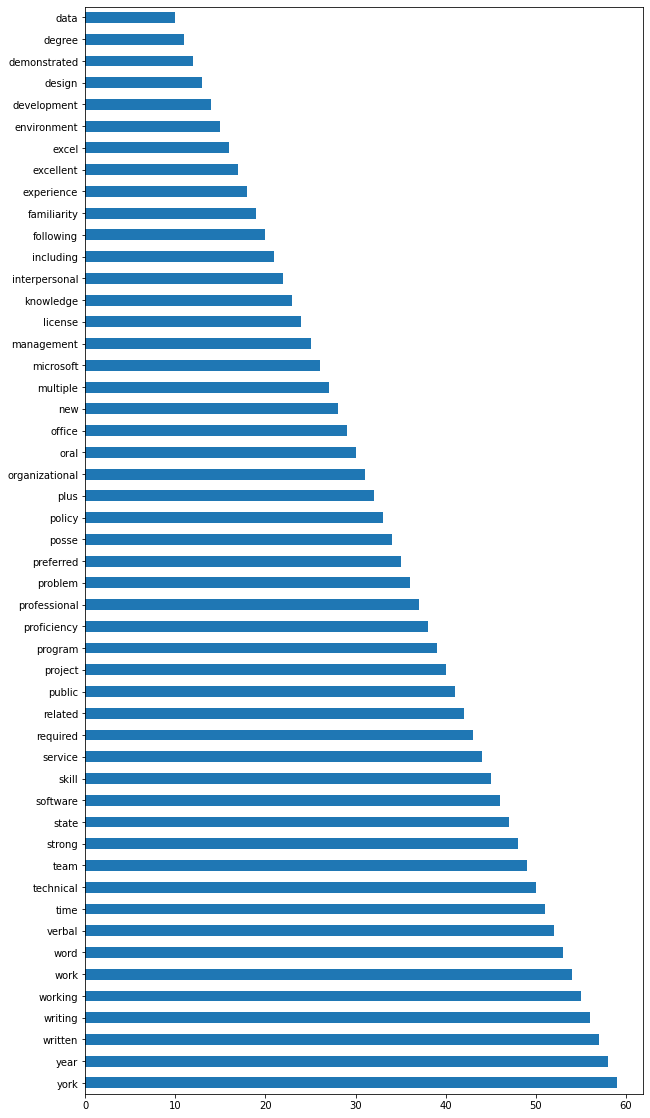

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=60
count_vectroizer =CountVectorizer(max_features=max_features,stop_words="english")# -----> stopwords unmeaning words
sparce_matrix = count_vectroizer.fit_transform(description_list).toarray()
dictionary = count_vectroizer.vocabulary_.items()  
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)
top_vacab = vocab_bef_stem.head(50)
top_vacab.plot(kind = 'barh', figsize=(10,20))

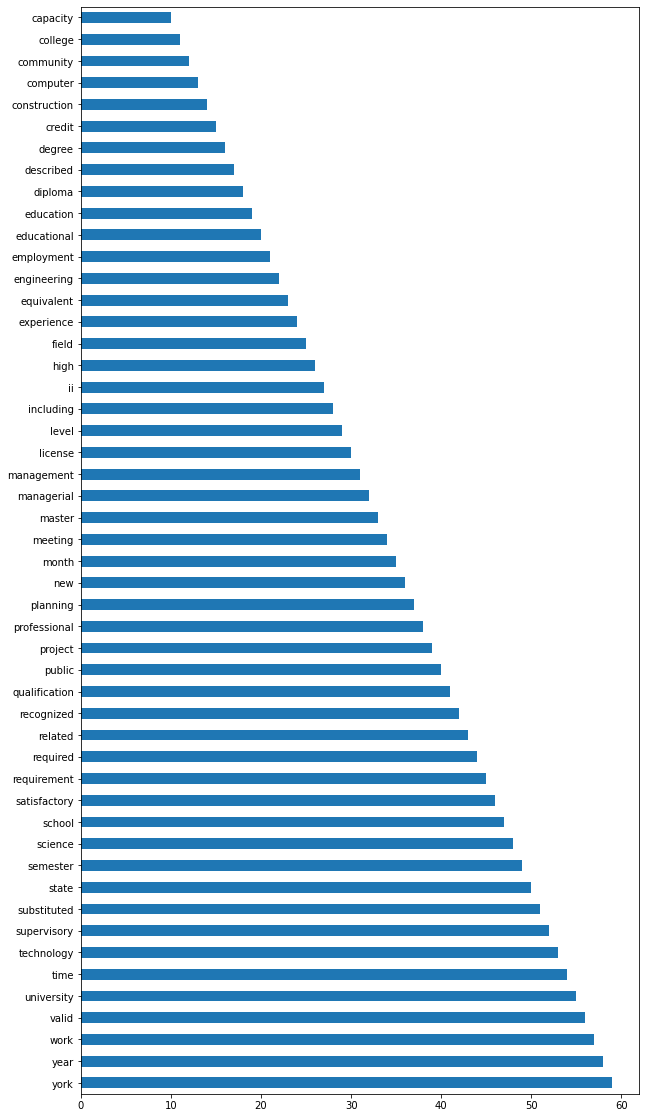

In [71]:
description_list2=[]
df['minR']=df['Minimum Qual Requirements']
for description2 in df.minR:
     description2=str(description2)
     description2 = description2.lower()
     description2 = nltk.word_tokenize(description2)
     lemma2 = nlp.WordNetLemmatizer()
     description2 = [lemma2.lemmatize(word) for word in description2]
     description2 =" ".join(description2)
     description_list2.append(description2)
        
        
from sklearn.feature_extraction.text import CountVectorizer
max_features=60
count_vectroizer2 =CountVectorizer(max_features=max_features,stop_words="english")# -----> stopwords unmeaning words
sparce_matrix2 = count_vectroizer2.fit_transform(description_list2).toarray()
dictionary2 = count_vectroizer2.vocabulary_.items()  
vocab2 = []
count2 = []
for key, value in dictionary2:
    vocab2.append(key)
    count2.append(value)
vocab_bef_stem2 = pd.Series(count2, index=vocab2)
vocab_bef_stem2 = vocab_bef_stem2.sort_values(ascending=False)
top_vacab2 = vocab_bef_stem2.head(50)
top_vacab2.plot(kind = 'barh', figsize=(10,20))

In [ ]:
df['civil_service'] =df['Civil Service Title']


groups = df.groupby(['civil_service']).size()
plt.figure(figsize=(10, ))
groups.plot.barh()

In [ ]:
df['location']=df['Work Location']
groups = df.groupby(['location']).size()
plt.figure(figsize=(10, 80))
groups.plot.barh()

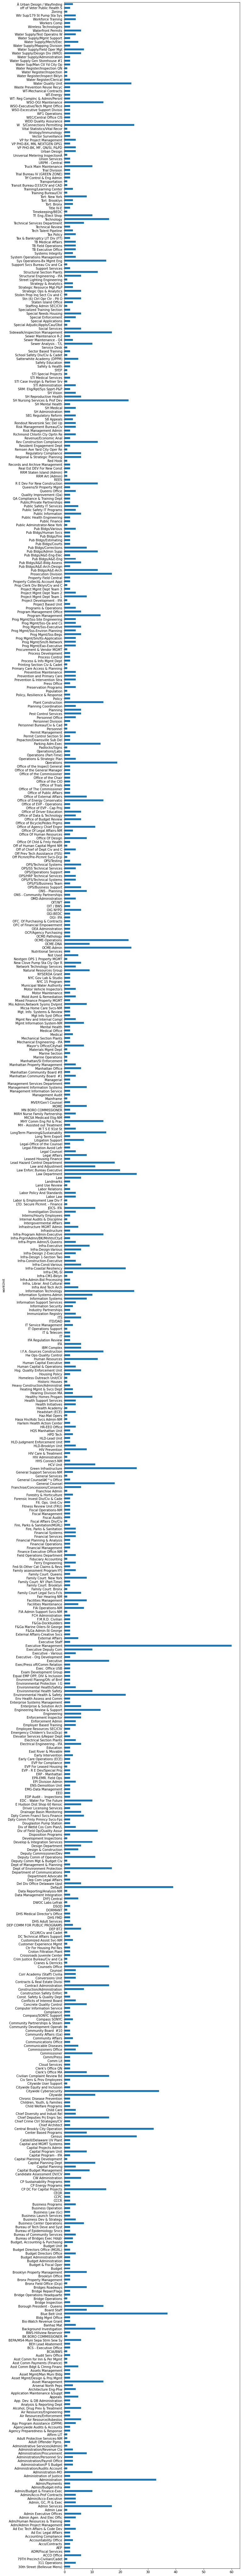

In [57]:
df['workUnit']=df['Division/Work Unit']
groups = df.groupby(['workUnit']).size()
plt.figure(figsize=(10, 150))
groups.plot.barh()

In [65]:
w_salary_table = df[['Division/Work Unit', 'Salary Range From', 'Salary Range To']]
df['workUnit']=df['Division/Work Unit']
#groups = df.groupby(['workUnit']).size().nlargest(5).sort_values(ascending=True)

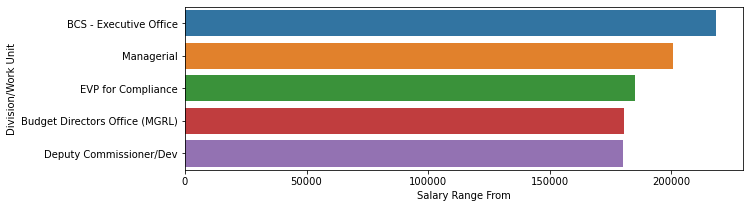

In [69]:
work_highest_high_range = pd.DataFrame(w_salary_table.groupby(['Division/Work Unit'])['Salary Range From'].mean().nlargest(5)).reset_index()
plt.figure(figsize=(10, 3))
#groups.plot.barh(groups,df['Salary Range From'])
sns.barplot(y='Division/Work Unit', x='Salary Range From', data=work_highest_high_range)

In [39]:
salary_table = df[['Civil Service Title', 'Salary Range From', 'Salary Range To']]

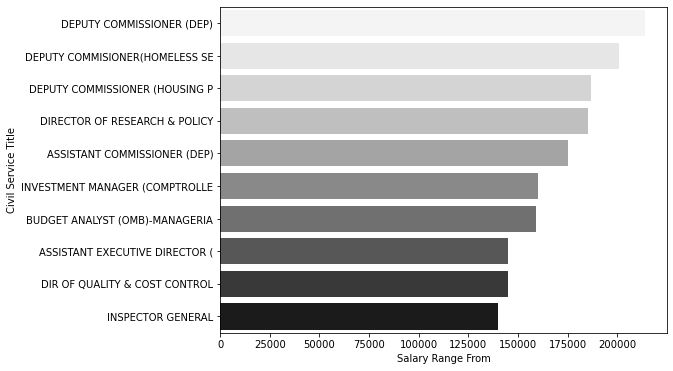

In [43]:
jobs_highest_high_range = pd.DataFrame(salary_table.groupby(['Civil Service Title'])['Salary Range From'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='Civil Service Title', x='Salary Range From', data=jobs_highest_high_range, palette='Greys')

In [44]:
b_salary_table = df[['Business Title', 'Salary Range From', 'Salary Range To']]

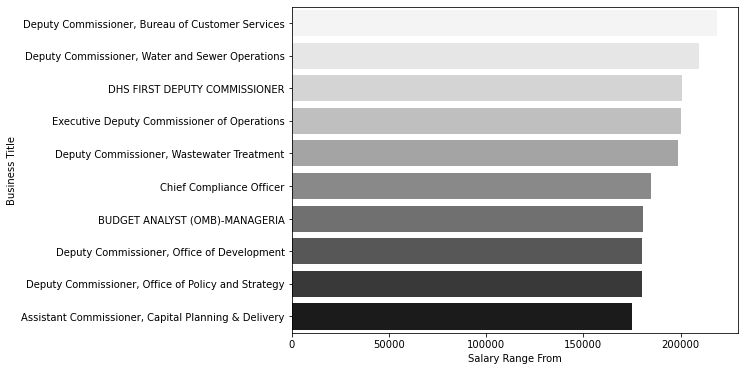

In [46]:
jobs_highest_high_range = pd.DataFrame(b_salary_table.groupby(['Business Title'])['Salary Range From'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='Business Title', x='Salary Range From', data=jobs_highest_high_range, palette='Greys')

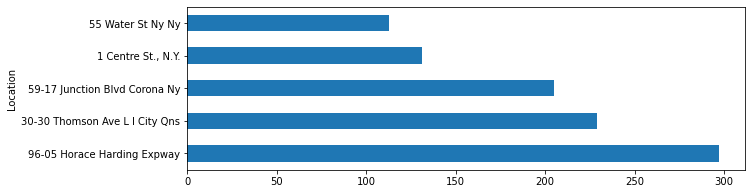

In [56]:
df['Location']=df['Work Location']
groups = df.groupby(['Location']).size().nlargest(5)
plt.figure(figsize=(10, 3))
groups.plot.barh()